## Importing libraries

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import calendar
import matplotlib.pyplot as plt
import datetime 
import seaborn as sns
import matplotlib.patches as mpatches

plt.rcParams['figure.figsize'] = [12 , 8]

## Reading datasets

In [2]:
cab_data = pd.read_csv('data/Cab_data.csv')

cab_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,8/1/16,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,6/1/16,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,2/1/16,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,7/1/16,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,3/1/16,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [3]:
cab_data['City'].unique()

array(['ATLANTA GA', 'AUSTIN TX', 'BOSTON MA', 'CHICAGO IL', 'DALLAS TX',
       'DENVER CO', 'LOS ANGELES CA', 'MIAMI FL', 'NASHVILLE TN',
       'NEW YORK NY', 'ORANGE COUNTY', 'PHOENIX AZ', 'PITTSBURGH PA',
       'SACRAMENTO CA', 'SAN DIEGO CA', 'SEATTLE WA', 'SILICON VALLEY',
       'TUCSON AZ', 'WASHINGTON DC'], dtype=object)

In [4]:
city_data = pd.read_csv('data/City.csv')

city_data.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [5]:
trans_data = pd.read_csv('data/Transaction_ID.csv')

trans_data.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [6]:
cust_data = pd.read_csv('data/Customer_ID.csv')

cust_data.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


## Joining data

In [7]:
data = cab_data.merge(city_data)\
.merge(trans_data)\
.merge(cust_data)

In [8]:
data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,8/1/16,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,"814,885","24,701",29290,Card,Male,28,10813
1,10351127,21/7/18,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,"814,885","24,701",29290,Cash,Male,28,10813
2,10412921,23/11/18,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,"814,885","24,701",29290,Card,Male,28,10813
3,10000012,6/1/16,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,"814,885","24,701",27703,Card,Male,27,9237
4,10320494,21/4/18,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,"814,885","24,701",27703,Card,Male,27,9237


## Checking for null/na values

In [9]:
data.isnull().sum()

Transaction ID        0
Date of Travel        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
Population            0
Users                 0
Customer ID           0
Payment_Mode          0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64

In [10]:
data.isna().sum()

Transaction ID        0
Date of Travel        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
Population            0
Users                 0
Customer ID           0
Payment_Mode          0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64

## Extracting year from date of travel

In [11]:
data['year'] = data['Date of Travel'].apply(lambda x: x.split('/')[2])

data['year'] = data['year'].apply(lambda x: '20' + str(x))

## Creating a new column for profit from each ride

In [12]:
data['profit'] = data['Price Charged'] - data['Cost of Trip']

## Creating income classes 


Low income: < 10k 

Middle income: > 10k and < 20K

High income: > 20 K

In [13]:
def income_classify(x):
    
    if x < 10000:
        return 'Low'
    elif x < 20000:
        return 'Medium'
    else:
        return 'High'

In [14]:
data['income_class'] = data['Income (USD/Month)'].apply(lambda x: income_classify(x))

## Creating age class


Young: < 25

Middle Aged: > 25 

Old: > 40    

In [15]:
def age_classify(x):
    
    if x < 26:
        return 'Young'
    elif x < 40:
        return 'Middle Aged'
    else:
        return 'Old'

In [16]:
data['age_class'] = data['Age'].apply(lambda x: age_classify(x))

## Creating new columns for day of week, month and day of month.

In [17]:
data['Date of Travel'] = data['Date of Travel'].apply(lambda x: datetime.datetime.strptime(x, '%d/%m/%y')) 

In [18]:
data['month'] = data['Date of Travel'].apply(lambda x: x.month)

In [19]:
data['day_of_month'] = data['Date of Travel'].apply(lambda x: x.day)

In [20]:
data['weekday'] = data['Date of Travel'].apply(lambda x: calendar.day_name[x.weekday()])

In [21]:
data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Customer ID,...,Gender,Age,Income (USD/Month),year,profit,income_class,age_class,month,day_of_month,weekday
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,"814,885","24,701",29290,...,Male,28,10813,2016,57.3150,Medium,Middle Aged,1,8,Friday
1,10351127,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,"814,885","24,701",29290,...,Male,28,10813,2018,281.2772,Medium,Middle Aged,7,21,Saturday
2,10412921,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,"814,885","24,701",29290,...,Male,28,10813,2018,194.6480,Medium,Middle Aged,11,23,Friday
3,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,"814,885","24,701",27703,...,Male,27,9237,2016,23.6660,Low,Middle Aged,1,6,Wednesday
4,10320494,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,"814,885","24,701",27703,...,Male,27,9237,2018,253.9808,Low,Middle Aged,4,21,Saturday


## Writing data to a csv file

In [22]:
data.to_csv('data/final_data.csv', index= False)

In [23]:
data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Customer ID,...,Gender,Age,Income (USD/Month),year,profit,income_class,age_class,month,day_of_month,weekday
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,"814,885","24,701",29290,...,Male,28,10813,2016,57.3150,Medium,Middle Aged,1,8,Friday
1,10351127,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,"814,885","24,701",29290,...,Male,28,10813,2018,281.2772,Medium,Middle Aged,7,21,Saturday
2,10412921,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,"814,885","24,701",29290,...,Male,28,10813,2018,194.6480,Medium,Middle Aged,11,23,Friday
3,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,"814,885","24,701",27703,...,Male,27,9237,2016,23.6660,Low,Middle Aged,1,6,Wednesday
4,10320494,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,"814,885","24,701",27703,...,Male,27,9237,2018,253.9808,Low,Middle Aged,4,21,Saturday


# PROFIT ANALYSIS

## 1. Average profit per ride for each Cab company in each city

In [24]:
average_profit = data.groupby(['Company', 'City'], as_index= False)['profit'].mean()

In [25]:
average_profit.head()

,Company,City,profit
0,Pink Cab,ATLANTA GA,54.511961
1,Pink Cab,AUSTIN TX,78.932168
2,Pink Cab,BOSTON MA,50.520960
3,Pink Cab,CHICAGO IL,34.047910
4,Pink Cab,DALLAS TX,17.920371


In [26]:
plt.rcParams['figure.figsize'] = [20 , 10]

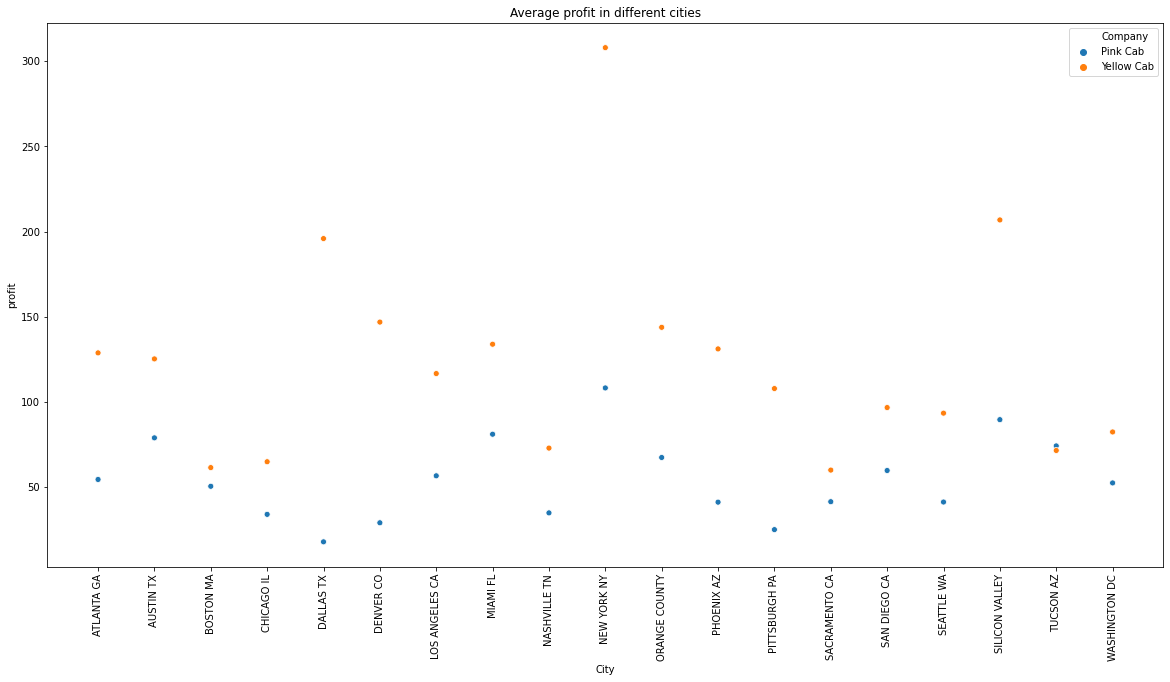

In [27]:
plt.xticks(rotation=90)
plt.title('Average profit in different cities')
sns.scatterplot(data = average_profit, x = 'City', y = 'profit', hue = 'Company')
plt.show()

## 2. Total number of males and females in each city

In [28]:
average_gender = data.groupby(['City', 'Gender'], as_index = False)['Transaction ID'].count()
average_gender.columns = ['City', 'Gender', 'Total']

In [29]:
average_gender.head()

,City,Gender,Total
0,ATLANTA GA,Female,3724
1,ATLANTA GA,Male,3833
2,AUSTIN TX,Female,2397
3,AUSTIN TX,Male,2499
4,BOSTON MA,Female,13163


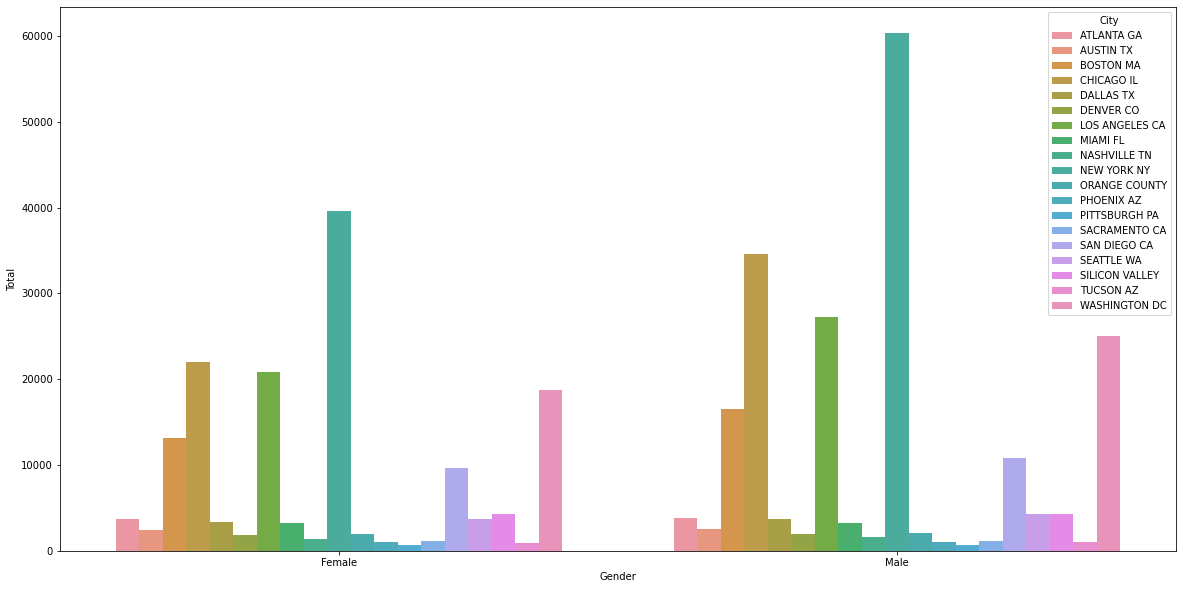

In [30]:
sns.barplot(x="Gender", y="Total", hue="City", data=average_gender, ci=None)

## 3. Creating a new data for checking customer retention for each company 

In [31]:
customer_retention = data.groupby(['Company', 'Customer ID'], as_index= False)['Transaction ID'].count()

In [32]:
customer_retention.columns = ['Company', 'Customer ID', 'No of riders']

In [33]:
# setting a condition for customers retained at more than 5 rides 
customer_retention = customer_retention[customer_retention['No of riders'] > 5]

customer_retention = customer_retention.groupby(['Company'], as_index = False)['No of riders'].count()

In [34]:
customer_retention

,Company,No of riders
0,Pink Cab,3690
1,Yellow Cab,14631


In [35]:
# Finding unique riders for each cab company
unique_users = data.groupby(['Company'], as_index= False)['Customer ID'].nunique()

unique_users.head()

0    32330
1    39896
Name: Customer ID, dtype: int64

In [36]:
customer_retention['total riders'] = unique_users

customer_retention['percent of riders retained'] = customer_retention['No of riders'] * 100/customer_retention['total riders']

customer_retention.head()

,Company,No of riders,total riders,percent of riders retained
0,Pink Cab,3690,32330,11.413548
1,Yellow Cab,14631,39896,36.672849


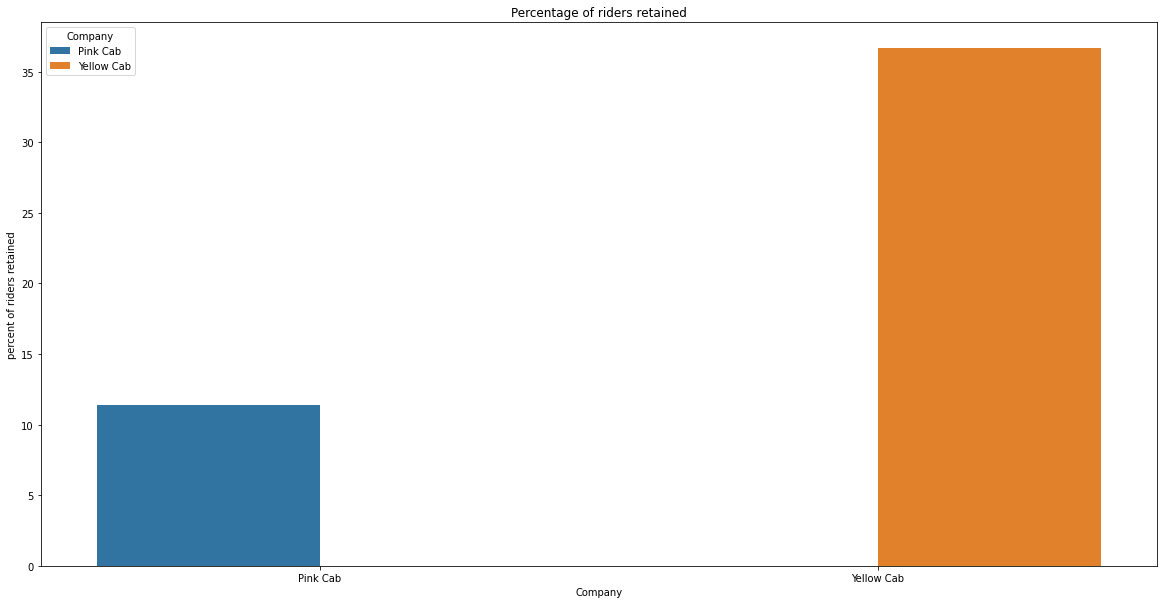

In [37]:
sns.barplot(x = 'Company', y = 'percent of riders retained',\
            data = customer_retention, hue = 'Company', ci=None)
plt.title('Percentage of riders retained')
plt.show()

## 4. Calculating the total number of users across all the cities

In [38]:
city_data['Users'] = city_data['Users'].apply(lambda x: int(x.replace(',', '')))

In [39]:
total_users = sum(city_data['Users'])

In [40]:
total_users

1290413

# 5. Time series forecasting of profit

## 5.1 Preparing data

In [41]:
monthly_data = data[data['day_of_month'] == 1]

In [42]:
yearly_profit = monthly_data.groupby(['Company', 'Date of Travel'], as_index= None)['profit'].mean()

In [43]:
yearly_profit.head()

,Company,Date of Travel,profit
0,Pink Cab,2016-02-01,19.485077
1,Pink Cab,2016-03-01,68.356235
2,Pink Cab,2016-04-01,54.720167
3,Pink Cab,2016-05-01,62.293220
4,Pink Cab,2016-06-01,34.262647


In [44]:
pink_profit = yearly_profit[yearly_profit['Company'] == 'Pink Cab'][['Date of Travel', 'profit']]\
.set_index('Date of Travel').sort_index()

In [45]:
yellow_profit = yearly_profit[yearly_profit['Company'] == 'Yellow Cab'][['Date of Travel', 'profit']]\
.set_index('Date of Travel').sort_index()

In [46]:
yellow_profit.index = pd.to_datetime(yellow_profit.index)

In [47]:
pink_profit.index = pd.to_datetime(pink_profit.index)

In [48]:
pink_profit.head()

,profit
Date of Travel,
2016-02-01,19.485077
2016-03-01,68.356235
2016-04-01,54.720167
2016-05-01,62.293220
2016-06-01,34.262647


In [49]:
yellow_profit.head()

,profit
Date of Travel,
2016-02-01,200.906279
2016-03-01,177.132809
2016-04-01,129.905027
2016-05-01,267.680239
2016-06-01,160.054668


Text(0.5, 1.0, 'Profit for Yellow cabs')

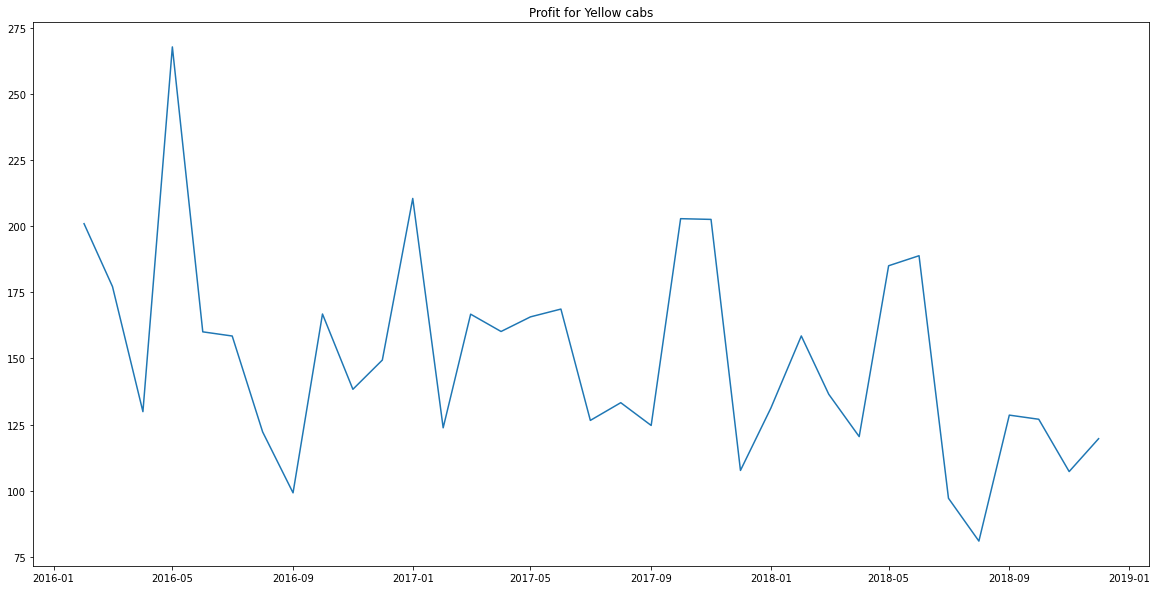

In [50]:
plt.plot(yellow_profit)
plt.title('Profit for Yellow cabs')

Text(0.5, 1.0, 'Profit for Pink cabs')

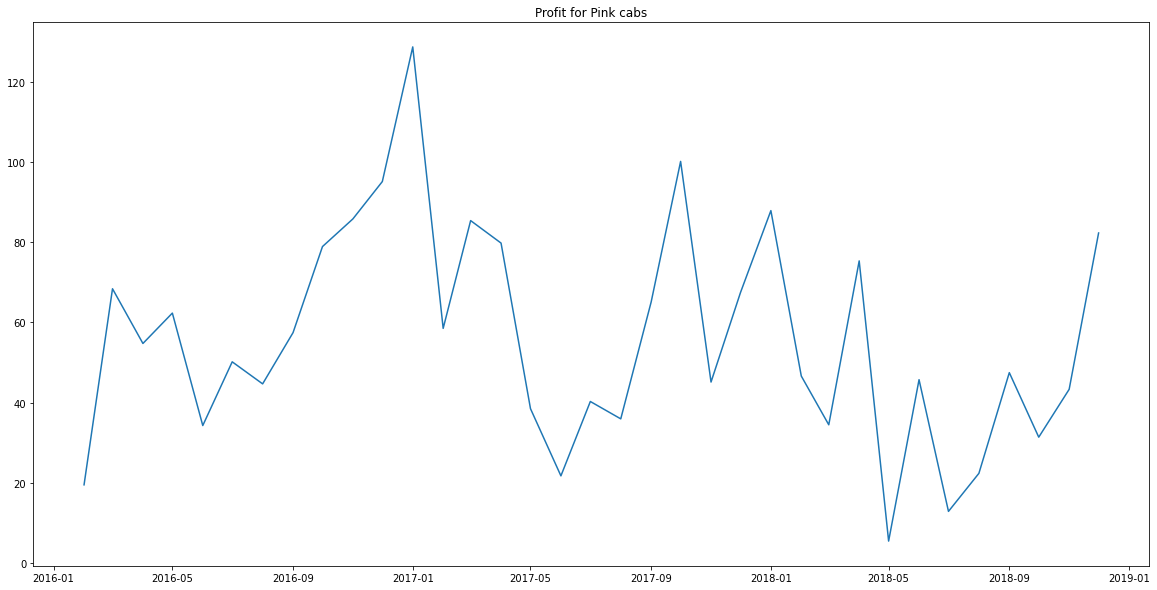

In [51]:
plt.plot(pink_profit)
plt.title('Profit for Pink cabs')

## Test and train data

We are using 2016-17 data as training data and 2018-19 data as test data

In [52]:
train_pink = pink_profit.loc[datetime.date(year=2016,month=1,day=2):datetime.date(year=2017, month=12, day=31)]

test_pink = pink_profit.loc[datetime.date(year=2018,month=1,day=1):]

In [53]:
train_yellow = yellow_profit.loc[datetime.date(year=2016,month=1,day=2):datetime.date(year=2017, month=12, day=31)]

test_yellow = yellow_profit.loc[datetime.date(year=2018,month=1,day=1):]

## Parameter Analysis for the ARIMA model

In [54]:
# Import the library 
from pmdarima import auto_arima 
  
# Ignore harmless warnings 
import warnings 
warnings.filterwarnings("ignore") 

In [55]:
# Fit auto_arima function to pink cabs data
stepwise_fit_pink = auto_arima(pink_profit, start_p = 1, start_q = 1, 
                          max_p = 3, max_q = 3, m = 12, 
                          start_P = 0, seasonal = True, 
                          d = None, D = 1, trace = True, 
                          error_action ='ignore',   # we don't want to know if an order does not work 
                          suppress_warnings = True,  # we don't want convergence warnings 
                          stepwise = True)           # set to stepwise 
  
# To print the summary 
stepwise_fit_pink.summary() 

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=219.707, Time=0.01 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=220.720, Time=0.11 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=221.190, Time=0.01 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=219.126, Time=0.08 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=221.128, Time=0.13 sec
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=221.124, Time=0.10 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=219.123, Time=0.09 sec
 ARIMA(0,0,0)(0,1,2)[12] intercept   : AIC=221.123, Time=0.39 sec
 ARIMA(0,0,0)(1,1,2)[12] intercept   : AIC=inf, Time=0.50 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=inf, Time=0.21 sec
 ARIMA(0,0,0)(0,1,1)[12]             : AIC=222.171, Time=0.04 sec

Best model:  ARIMA(0,0,0)(0,1,1)[12] intercept
Total fit time: 2.145 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                  
==================================================================================
Dep. Variable:                          y   No. Observations:                   35
Model:             SARIMAX(0, 1, [1], 12)   Log Likelihood                -106.562
Date:                    Sun, 07 Mar 2021   AIC                            219.123
Time:                            22:47:42   BIC                            222.530
Sample:                                 0   HQIC                           219.980
                                     - 35                                         
Covariance Type:                      opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    -10.0084      4.412     -2.269      0.023     -18.655      -1.362
ma.S.L12      -0.6793      1.370     -0.496      0.620      -3.364       2.006
sigma2       476.0611    642.180      0.741      0.458    -782.589    1734.711
===================================================================================
Ljung-Box (Q):                       21.67   Jarque-Bera (JB):                 0.99
Prob(Q):                              0.48   Prob(JB):                         0.61
Heteroskedasticity (H):               1.18   Skew:                            -0.05
Prob(H) (two-sided):                  0.82   Kurtosis:                         1.99
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [56]:
# Fit auto_arima function to pink cabs data
stepwise_fit_yellow = auto_arima(yellow_profit, start_p = 1, start_q = 1, 
                          max_p = 3, max_q = 3, m = 12, 
                          start_P = 0, seasonal = True, 
                          d = None, D = 1, trace = True, 
                          error_action ='ignore',   # we don't want to know if an order does not work 
                          suppress_warnings = True,  # we don't want convergence warnings 
                          stepwise = True)           # set to stepwise 
  
# To print the summary 
stepwise_fit_yellow.summary() 

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.29 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=245.432, Time=0.01 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=238.279, Time=0.10 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.18 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=246.489, Time=0.01 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=247.366, Time=0.06 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=inf, Time=0.21 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=240.292, Time=0.19 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=242.272, Time=0.26 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=238.730, Time=0.09 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=238.735, Time=0.17 sec
 ARIMA(1,0,1)(1,1,0)[12] intercept   : AIC=239.468, Time=0.28 sec
 ARIMA(0,0,1)(1,1,0)[12] intercept   : AIC=237.472, Time=0.12 sec
 ARIMA(0,0,1)(0,1,0)[12] intercept   : AIC=247.33

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   35
Model:             SARIMAX(0, 0, 1)x(1, 1, [], 12)   Log Likelihood                -114.736
Date:                             Sun, 07 Mar 2021   AIC                            237.472
Time:                                     22:47:46   BIC                            242.014
Sample:                                          0   HQIC                           238.615
                                              - 35                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    -26.7775      5.171     -5.178      0.000     -36.913     -16.642
ma.L1         -0.4496      0.210     -2.138      0.033      -0.862      -0.037
ar.S.L12      -0.8576      0.090     -9.495      0.000      -1.035      -0.681
sigma2       625.4737    290.867      2.150      0.032      55.384    1195.563
===================================================================================
Ljung-Box (Q):                       17.26   Jarque-Bera (JB):                 1.29
Prob(Q):                              0.75   Prob(JB):                         0.53
Heteroskedasticity (H):               1.61   Skew:                             0.53
Prob(H) (two-sided):                  0.51   Kurtosis:                         2.53
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [57]:
# Fit a SARIMAX(0, 0, 0)x(0, 1, 1, 12) on the pink cabs training set 
from statsmodels.tsa.statespace.sarimax import SARIMAX 
  
pink_model = SARIMAX(train_pink,  
                order = (0, 0, 0),  
                seasonal_order =(0, 1, 1, 12)) 
  
result_pink = pink_model.fit() 
result_pink.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                  
==================================================================================
Dep. Variable:                     profit   No. Observations:                   23
Model:             SARIMAX(0, 1, [1], 12)   Log Likelihood                 -50.502
Date:                    Sun, 07 Mar 2021   AIC                            105.004
Time:                            22:47:46   BIC                            105.800
Sample:                        02-01-2016   HQIC                           104.502
                             - 12-01-2017                                         
Covariance Type:                      opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L12      -0.7929   1446.523     -0.001      1.000   -2835.926    2834.341
sigma2       349.6870   4.93e+05      0.001      0.999   -9.65e+05    9.66e+05
===================================================================================
Ljung-Box (Q):                       16.33   Jarque-Bera (JB):                 0.58
Prob(Q):                              0.09   Prob(JB):                         0.75
Heteroskedasticity (H):               0.97   Skew:                             0.05
Prob(H) (two-sided):                  0.98   Kurtosis:                         1.88
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [58]:
yellow_model = SARIMAX(train_yellow,  
                order = (0, 0, 1),  
                seasonal_order =(1, 1, 0, 12)) 
  
result_yellow = yellow_model.fit() 
result_yellow.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                              profit   No. Observations:                   23
Model:             SARIMAX(0, 0, 1)x(1, 1, [], 12)   Log Likelihood                 -58.294
Date:                             Sun, 07 Mar 2021   AIC                            122.589
Time:                                     22:47:46   BIC                            123.782
Sample:                                 02-01-2016   HQIC                           121.836
                                      - 12-01-2017                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.1241      0.622     -0.199      0.842      -1.344       1.096
ar.S.L12      -0.9607     57.413     -0.017      0.987    -113.489     111.568
sigma2       181.6592    2.6e+05      0.001      0.999   -5.09e+05     5.1e+05
===================================================================================
Ljung-Box (Q):                        8.87   Jarque-Bera (JB):                 0.42
Prob(Q):                              0.54   Prob(JB):                         0.81
Heteroskedasticity (H):               0.49   Skew:                            -0.33
Prob(H) (two-sided):                  0.51   Kurtosis:                         2.30
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Predictions of ARIMA Model against the test set

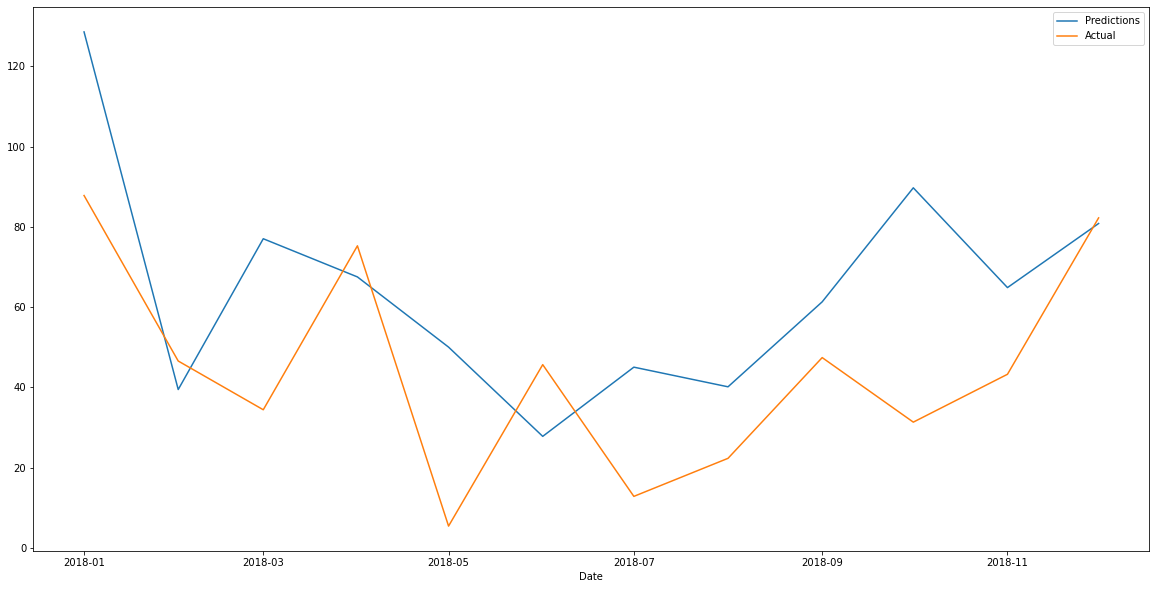

In [59]:
start = len(train_pink) 
end = len(train_pink) + len(test_pink) - 1
  
# Predictions for one-year against the test set 
predictions = result_pink.predict(start, end, 
                             typ = 'levels').rename("Predictions") 
  
plt.plot(predictions)
plt.plot(test_pink)
plt.xlabel('Date')
plt.legend(['Predictions', 'Actual'])
plt.show()

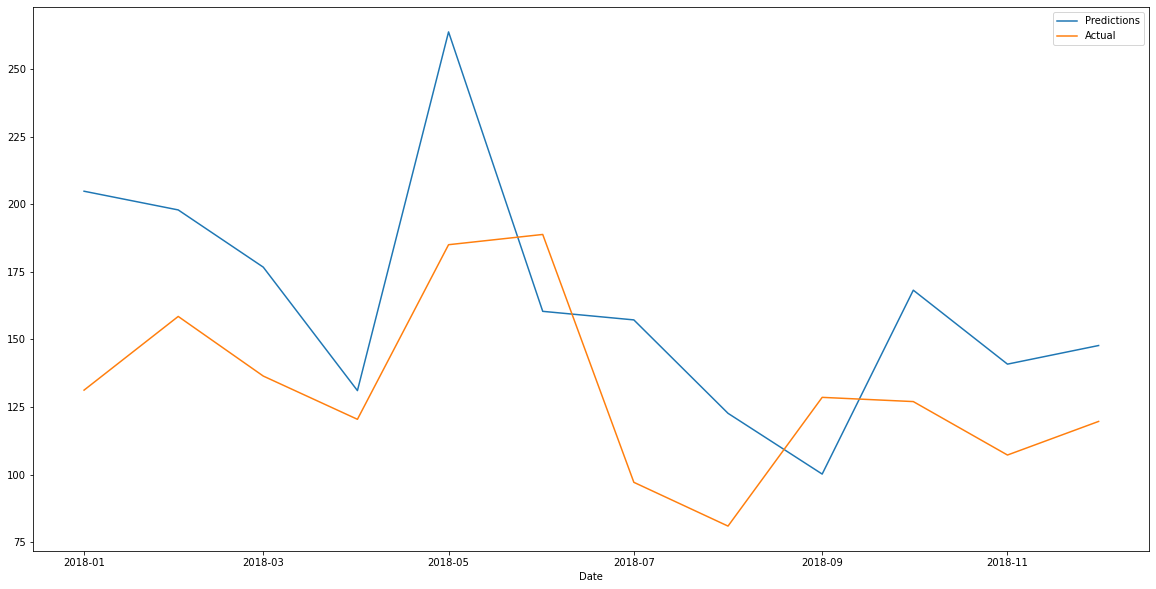

In [60]:
start = len(train_yellow) 
end = len(train_yellow) + len(test_yellow) - 1
  
# Predictions for one-year against the test set 
predictions = result_yellow.predict(start, end, 
                             typ = 'levels').rename("Predictions") 
  
plt.plot(predictions)
plt.plot(test_yellow)
plt.xlabel('Date')
plt.legend(['Predictions', 'Actual'])
plt.show()

## Forecasting for the next 2 years

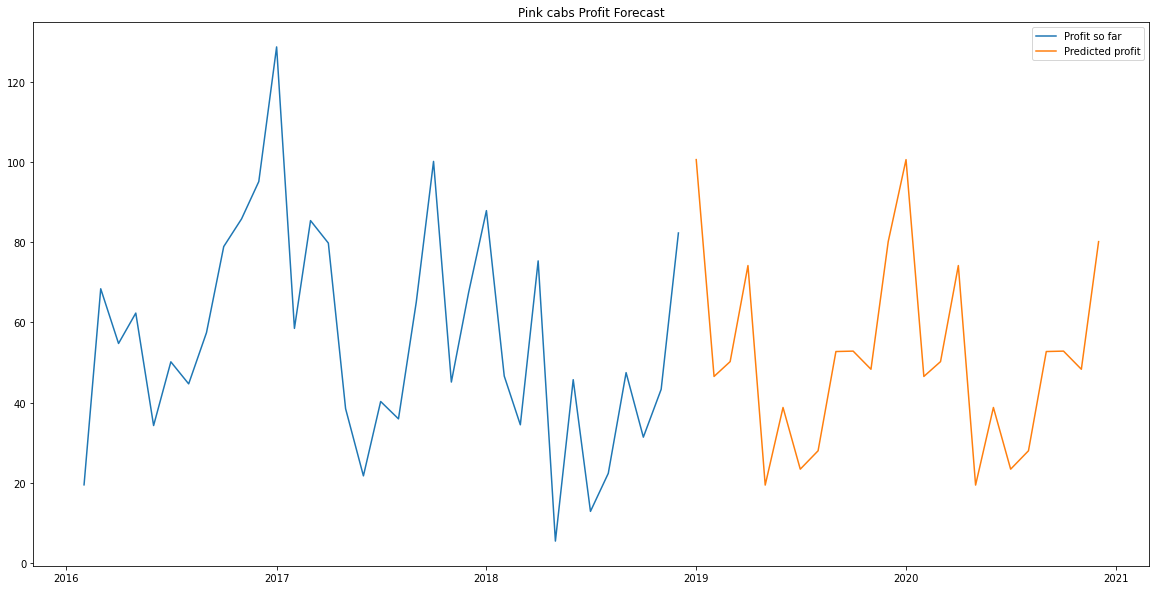

In [61]:
# Train the model on the full dataset 
model = SARIMAX(pink_profit,  
                order = (0, 0, 0),  
                seasonal_order =(0, 1, 1, 12)) 

result = model.fit() 
  
# Forecast for the next 3 years 
forecast = result.predict(start = len(pink_profit),  
                          end = (len(pink_profit)-1) + 2 * 12,  
                          typ = 'levels').rename('Forecast') 
  
# Plot the forecast values
plt.plot(pink_profit)
plt.plot(forecast)
plt.legend(['Profit so far', 'Predicted profit'])
plt.title('Pink cabs Profit Forecast')
plt.show()

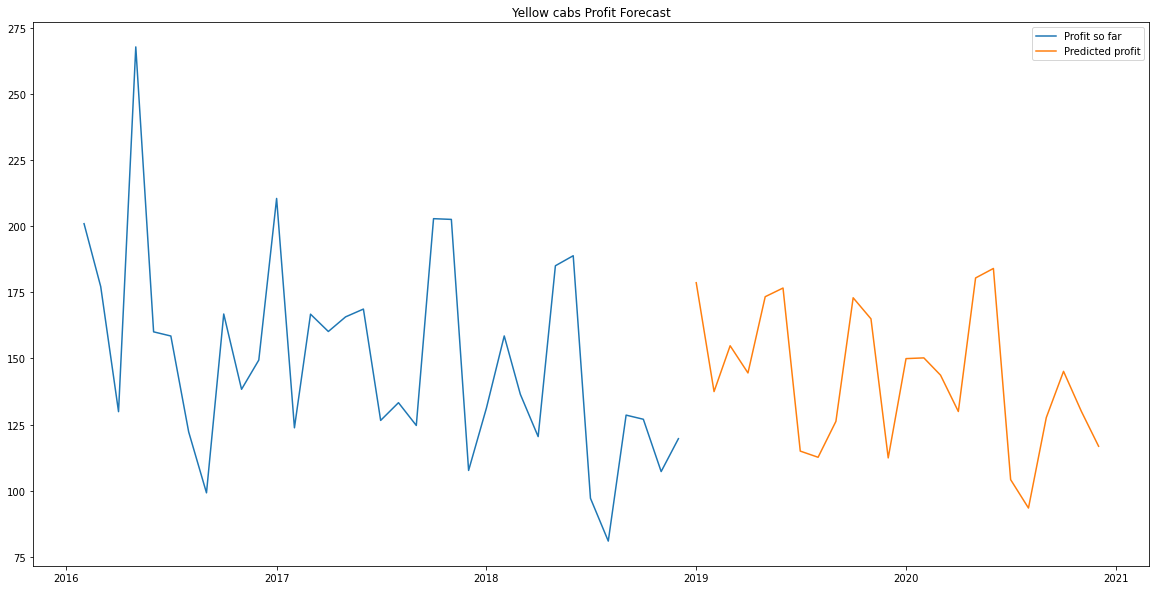

In [62]:
# Train the model on the full dataset 
model = SARIMAX(yellow_profit,  
                order = (0, 0, 1),  
                seasonal_order =(1, 1, 0, 12)) 

result = model.fit() 
  
# Forecast for the next 3 years 
forecast = result.predict(start = len(yellow_profit),  
                          end = (len(yellow_profit)-1) + 2 * 12,  
                          typ = 'levels').rename('Forecast') 
  
# Plot the forecast values
plt.plot(yellow_profit)
plt.plot(forecast)
plt.legend(['Profit so far', 'Predicted profit'])
plt.title('Yellow cabs Profit Forecast')
plt.show()

# 6. Predicting profit from the data

I decided to use a Random forest regressor model to predict the profit

## 6.1 Data cleaning and transformation

In [63]:
data.columns

Index(['Transaction ID', 'Date of Travel', 'Company', 'City', 'KM Travelled',
       'Price Charged', 'Cost of Trip', 'Population', 'Users', 'Customer ID',
       'Payment_Mode', 'Gender', 'Age', 'Income (USD/Month)', 'year', 'profit',
       'income_class', 'age_class', 'month', 'day_of_month', 'weekday'],
      dtype='object')

In [64]:
# removing irrelevant features
data = data[['Company', 'year', 'month', 'income_class',
             'Age', 'Payment_Mode', 'City', 'Price Charged', 'Cost of Trip',
             'weekday', 'day_of_month', 'KM Travelled', 'profit'
            ]]

In [65]:
train = data.loc[:, data.columns != 'profit']

In [66]:
label = data[['profit']]

In [67]:
## One hot encoding

features = pd.get_dummies(train)

In [68]:
features.columns

Index(['month', 'Age', 'Price Charged', 'Cost of Trip', 'day_of_month',
       'KM Travelled', 'Company_Pink Cab', 'Company_Yellow Cab', 'year_2016',
       'year_2017', 'year_2018', 'income_class_High', 'income_class_Low',
       'income_class_Medium', 'Payment_Mode_Card', 'Payment_Mode_Cash',
       'City_ATLANTA GA', 'City_AUSTIN TX', 'City_BOSTON MA',
       'City_CHICAGO IL', 'City_DALLAS TX', 'City_DENVER CO',
       'City_LOS ANGELES CA', 'City_MIAMI FL', 'City_NASHVILLE TN',
       'City_NEW YORK NY', 'City_ORANGE COUNTY', 'City_PHOENIX AZ',
       'City_PITTSBURGH PA', 'City_SACRAMENTO CA', 'City_SAN DIEGO CA',
       'City_SEATTLE WA', 'City_SILICON VALLEY', 'City_TUCSON AZ',
       'City_WASHINGTON DC', 'weekday_Friday', 'weekday_Monday',
       'weekday_Saturday', 'weekday_Sunday', 'weekday_Thursday',
       'weekday_Tuesday', 'weekday_Wednesday'],
      dtype='object')

## 6.2 Features and Targets and Convert Data to Arrays

In [69]:
# Use numpy to convert to arrays
import numpy as np

# Labels are the values we want to predict
labels = np.array(label)

# Saving feature names for later use
feature_list = list(features.columns)

# Convert to numpy array
features = np.array(features)

## 6.3 Train test validation

In [70]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.10, random_state = 42)

In [71]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)


Training Features Shape: (323452, 42)
Training Labels Shape: (323452, 1)
Testing Features Shape: (35940, 42)
Testing Labels Shape: (35940, 1)


## 6.4 Training the model

In [72]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor

# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 10, random_state = 42)

# Train the model on training data
rf.fit(train_features, train_labels);

## 6.5 Making predictions

In [80]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
# Calculate the absolute errors

errors = np.sum((predictions - test_labels)**2)
# Print out the mean absolute error (mae)

print((errors**0.5)/len(test_labels))

225.21175884390743
